# Titanic Survival analysis:
On the night of 14 April 1912, around 11:40 pm, while the RMS Titanic was sailing about 400 mi (640 km) south of the Grand Banks of Newfoundland, the ship struck an iceberg and began to sink. Shortly before midnight, Captain Edward Smith ordered the ship's lifeboats to be readied and a distress call was sent out. The closest ship to respond was Cunard Line's Carpathia 58 mi (93 km) away, which would arrive in an estimated 4 hours—too late to rescue all of Titanic's passengers. Forty-five minutes after the ship hit the iceberg, Captain Smith ordered the lifeboats to be loaded and lowered under the orders women and children first.
Titanic's passengers numbered 1,317 people: 324 in first class, 284 in second class, and 709 in third class. Of these, 805 were male and 434 were female; 112 children were aboard, the largest number of which were in third class. The ship was considerably under capacity on her maiden voyage, as she could accommodate 2,453 passengers—833 first class, 614 second class, and 1,006 third class.

In [1]:
#data analysis libraries
import numpy as np
import pandas as pd


#Visulaization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import label encoder 
from sklearn import preprocessing

#ignore warnings 
import warnings
warnings.filterwarnings('ignore')

2) Read in and Explore the Data
It's time to read in our training and testing data using pd.read_csv, and take a first look at the training data using the describe() function.

In [2]:
data =pd.read_csv('Titanic_traindataset.csv')
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
#df2 =pd.read_csv('Titanic_testdataset.csv')
#df2.describe(include='all')

In [4]:
#to get the list of columns/features in the data set 
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
data.shape

(891, 12)

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Mean Imputation
mean = data['Age'].mean()
print(mean)

29.69911764705882


In [10]:
median = data['Age'].median()
print(median)

28.0


In [11]:
mode = data['Age'].mode()
print(mode)

0    24.0
dtype: float64


In [12]:
data['Age'] = data['Age'].fillna(median)

In [13]:
pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


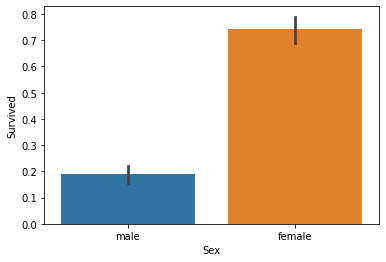

In [14]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=data)
#print percentages of females vs. males that survive
print("Percentage of females who survived:", data["Survived"][data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", data["Survived"][data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

In [15]:
data.value_counts('Pclass')

Pclass
3    491
1    216
2    184
dtype: int64

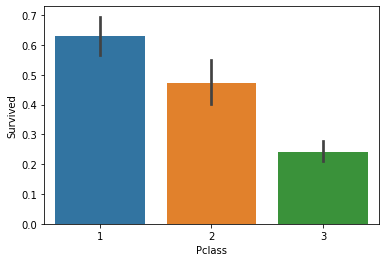

Percentage of passengers survived in pclass:1= 62.96296296296296
Percentage of passengers survived in pclass:2= 47.28260869565217
Percentage of passengers survived in pclass:3= 24.236252545824847


In [60]:
#draw a bar plot of survival by Pclass
#Pclass: refers to passenger class (1st, 2nd, 3rd), and is a proxy for socio-economic class

sns.barplot(x="Pclass", y="Survived", data=data)
plt.show()

print("Percentage of passengers survived in pclass:1=", data["Survived"][data["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of passengers survived in pclass:2=", data["Survived"][data["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of passengers survived in pclass:3=", data["Survived"][data["Pclass"] == 3].value_counts(normalize = True)[1]*100)


In [ ]:
The number of  survived 

In [17]:
data.value_counts('SibSp')

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
dtype: int64

Percentage of passengers survived having Sibsp:0= 34.53947368421053
Percentage of passengers survived having Sibsp:1= 53.588516746411486
Percentage of passengers survived having Sibsp:2= 46.42857142857143
Percentage of passengers survived having Sibsp:3= 46.42857142857143


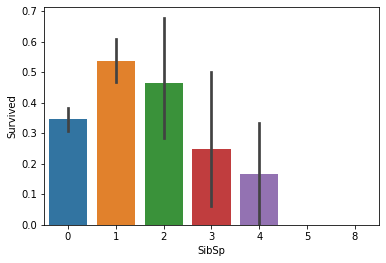

In [62]:
#draw a bar plot for 'SibSp' vs. survival
#SibSp:Number of Siblings/Spouses Aboard

sns.barplot(x="SibSp", y="Survived", data=data)

print("Percentage of passengers survived having Sibsp:0=", data["Survived"][data["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of passengers survived having Sibsp:1=", data["Survived"][data["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of passengers survived having Sibsp:2=", data["Survived"][data["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of passengers survived having Sibsp:3=", data["Survived"][data["SibSp"] == 2].value_counts(normalize = True)[1]*100)

plt.show()

Percentage of passengers survived having Parch:0= 34.365781710914455
Percentage of passengers survived having Parch:1= 55.08474576271186
Percentage of passengers survived having Parch:2= 50.0
Percentage of passengers survived having Parch:3= 60.0


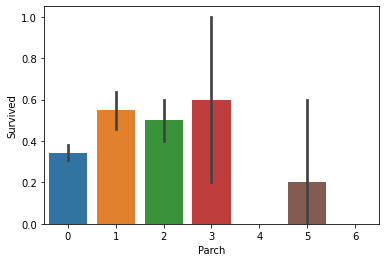

In [64]:
#draw a bar plot for Parch vs. survival
#Parch:number of parents / children aboard the Titanic
sns.barplot(x="Parch", y="Survived", data=data)
print("Percentage of passengers survived having Parch:0=", data["Survived"][data["Parch"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of passengers survived having Parch:1=", data["Survived"][data["Parch"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of passengers survived having Parch:2=", data["Survived"][data["Parch"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of passengers survived having Parch:3=", data["Survived"][data["Parch"] == 3].value_counts(normalize = True)[1]*100)

plt.show()

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

In [20]:
min_value = data['Age'].min()
max_value = data['Age'].max()
print(min_value)
print(max_value)

0.42
80.0


In [21]:
 #use the linspace() function of the numpy package to calculate the 6 bins, equally distributed.
bins = np.linspace(min_value,max_value,6)
bins

array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ])

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

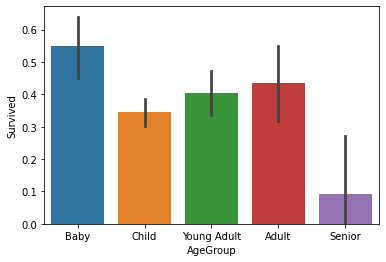

In [22]:
labels = ['Baby', 'Child', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, include_lowest=True)
sns.barplot(x="AgeGroup", y="Survived", data=data)

In [23]:
data.value_counts('Survived')

Survived
0    549
1    342
dtype: int64

In [24]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Child
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Child
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Child
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Child
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Child
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Child


In [25]:
data1 = data.drop(['Name','Ticket','Fare','Cabin','Age'],axis=1)
data1

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup
0,1,0,3,male,1,0,S,Child
1,2,1,1,female,1,0,C,Young Adult
2,3,1,3,female,0,0,S,Child
3,4,1,1,female,1,0,S,Young Adult
4,5,0,3,male,0,0,S,Young Adult
...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,S,Child
887,888,1,1,female,0,0,S,Child
888,889,0,3,female,1,2,S,Child
889,890,1,1,male,0,0,C,Child


In [26]:
data1.value_counts('Embarked')

Embarked
S    644
C    168
Q     77
dtype: int64

In [27]:
pd.isnull(data1).sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       2
AgeGroup       0
dtype: int64

In [28]:
mode = data1['Embarked'].mode()
print(mode)

0    S
dtype: object


In [29]:
data1['Embarked'] = data1['Embarked'].fillna('S')

In [30]:
pd.isnull(data1).sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [31]:
label_encoder = preprocessing.LabelEncoder()

In [32]:
data1['Embarked']= label_encoder.fit_transform(data1['Embarked'])
data1['AgeGroup']= label_encoder.fit_transform(data1['AgeGroup'])
data1['Sex']= label_encoder.fit_transform(data1['Sex'])

In [33]:
data1

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup
0,1,0,3,1,1,0,2,2
1,2,1,1,0,1,0,0,4
2,3,1,3,0,0,0,2,2
3,4,1,1,0,1,0,2,4
4,5,0,3,1,0,0,2,4
...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,2,2
887,888,1,1,0,0,0,2,2
888,889,0,3,0,1,2,2,2
889,890,1,1,1,0,0,0,2


# Testing Different Models

Logistic regression module 

In [34]:
# Dividing our data into input and output variables 
X = data1.iloc[:,2:]
Y = data1.iloc[:,1]

In [35]:
X

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup
0,3,1,1,0,2,2
1,1,0,1,0,0,4
2,3,0,0,0,2,2
3,1,0,1,0,2,4
4,3,1,0,0,2,4
...,...,...,...,...,...,...
886,2,1,0,0,2,2
887,1,0,0,0,2,2
888,3,0,1,2,2,2
889,1,1,0,0,0,2


In [36]:
data1.value_counts('Survived')

Survived
0    549
1    342
dtype: int64

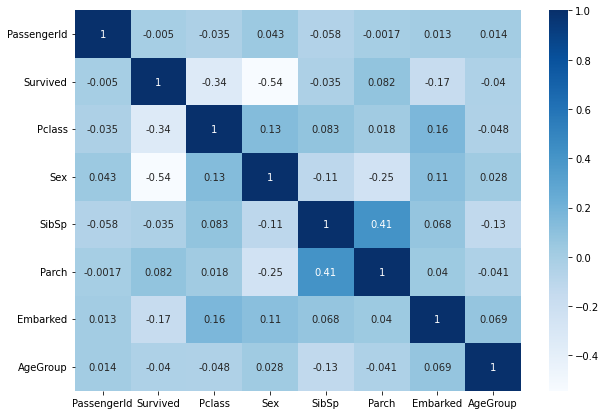

In [54]:
plt.figure(figsize=(10,7))
sns.heatmap(data1.corr(), annot=True,cmap='Blues')
plt.show()

# Logistic regression  Model building

Import logisrtic regression model and fit the model

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [39]:
y_pred_df= pd.DataFrame({'actual_Survival': Y,
                         'predicted_Survival': classifier.predict(X)})

In [40]:
y_pred_df.head(5)

,actual_Survival,predicted_Survival
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


# ROC Curve

In [44]:
#The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR).

Text(0, 0.5, 'True Positive Rate')

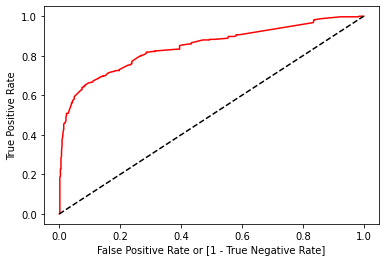

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1:])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [46]:
auc

0.7774662064998562

# Model Accuracy

In [50]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[470  79]
 [103 239]]


In [51]:
#Accuracy 
((465+241)/(465+84+101+241))*100

79.2368125701459

In [52]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.75      0.70      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.79      0.80      0.79       891



# Model validation - by different validation teachniques

In [ ]:
 # Evaluating using Train test split method

In [66]:
from sklearn.model_selection import train_test_split

In [69]:
X = data1.iloc[:,2:]
Y = data1.iloc[:,1]

In [71]:
X = X
Y = Y
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
train_result = model.score(X_train, Y_train)
test_result = model.score(X_test, Y_test)

In [72]:
train_result*100, test_result*100

(81.04026845637584, 76.94915254237287)

In [73]:
# Evaluate using Cross Validation

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [75]:
X = X
Y = Y
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=400)
results = cross_val_score(model, X, Y, cv=kfold)

In [76]:
results


array([0.78888889, 0.7752809 , 0.79775281, 0.7752809 , 0.80898876,
       0.84269663, 0.76404494, 0.75280899, 0.74157303, 0.88764045])

In [77]:
results.mean()*100.0

79.34956304619226

In [78]:
results.std()*100.0

4.176795751152709

In [81]:
#Evaluate using Leave One Out Cross Validation

In [82]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
X = X 
Y = Y
loocv = LeaveOneOut()
model = LogisticRegression(max_iter=300)
results = cross_val_score(model, X, Y, cv=loocv)

In [83]:
results.mean()*100.0

79.12457912457911

# Conclusion:

'The number of female's survived % is hight than the Male survived %.

The number of passenger survived in pclass 1 and 2 are higher than the passenger survived in pclass 3.

The number of passenger survived in Sibsp 1 are higher than the passengers having SibSp 2 and 3.'

'''
Percentage of females who survived: 74.20382165605095

Percentage of males who survived: 18.890814558058924

Percentage of passengers survived in pclass:1= 62.96296296296296

Percentage of passengers survived in pclass:2= 47.28260869565217

Percentage of passengers survived in pclass:3= 24.236252545824847

Percentage of passengers survived having Sibsp:0= 34.53947368421053

Percentage of passengers survived having Sibsp:1= 53.588516746411486

Percentage of passengers survived having Sibsp:2= 46.42857142857143

Percentage of passengers survived having Sibsp:3= 46.42857142857143'''